In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from pandas_profiling import ProfileReport

In [2]:
# Leitura dos dados
dt_test = pd.read_csv('churn-bigml-20.csv')
dt_train = pd.read_csv('churn-bigml-80.csv')

In [3]:
# Gerando report
df = pd.concat([dt_test, dt_train], ignore_index=True, sort=False)
profile = ProfileReport(df, title='Info telecom', explorative=True)

profile.to_widgets()

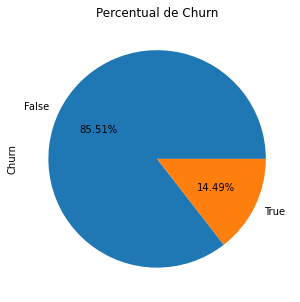

In [4]:
# Mostrando desbalanceamento do churn
plt.figure(figsize=(5,5))
plt.title('Percentual de Churn')

df['Churn'].value_counts().plot.pie(autopct='%1.2f%%')
plt.show()

In [5]:
df.head(10)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False
5,AK,36,408,No,Yes,30,146.3,128,24.87,162.5,80,13.81,129.3,109,5.82,14.5,6,3.92,0,False
6,MI,65,415,No,No,0,211.3,120,35.92,162.6,122,13.82,134.7,118,6.06,13.2,5,3.56,3,False
7,ID,119,415,No,No,0,159.1,114,27.05,231.3,117,19.66,143.2,91,6.44,8.8,3,2.38,5,True
8,VA,10,408,No,No,0,186.1,112,31.64,190.2,66,16.17,282.8,57,12.73,11.4,6,3.08,2,False
9,WI,68,415,No,No,0,148.8,70,25.30,246.5,164,20.95,129.8,103,5.84,12.1,3,3.27,3,False


In [6]:
# Trocando dados categóricos para númericos
df['Churn'] = df['Churn'].replace('False', 0).replace('True', 1).astype('int')
df['International plan'] = df['International plan'].replace('No', 0).replace('Yes', 1).astype('int')
df['Voice mail plan'] = df['Voice mail plan'].replace('No', 0).replace('Yes', 1).astype('int')

df.head(10)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,0,0,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,0
1,IN,65,415,0,0,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,1
2,NY,161,415,0,0,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,1
3,SC,111,415,0,0,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,0
4,HI,49,510,0,0,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,0
5,AK,36,408,0,1,30,146.3,128,24.87,162.5,80,13.81,129.3,109,5.82,14.5,6,3.92,0,0
6,MI,65,415,0,0,0,211.3,120,35.92,162.6,122,13.82,134.7,118,6.06,13.2,5,3.56,3,0
7,ID,119,415,0,0,0,159.1,114,27.05,231.3,117,19.66,143.2,91,6.44,8.8,3,2.38,5,1
8,VA,10,408,0,0,0,186.1,112,31.64,190.2,66,16.17,282.8,57,12.73,11.4,6,3.08,2,0
9,WI,68,415,0,0,0,148.8,70,25.30,246.5,164,20.95,129.8,103,5.84,12.1,3,3.27,3,0


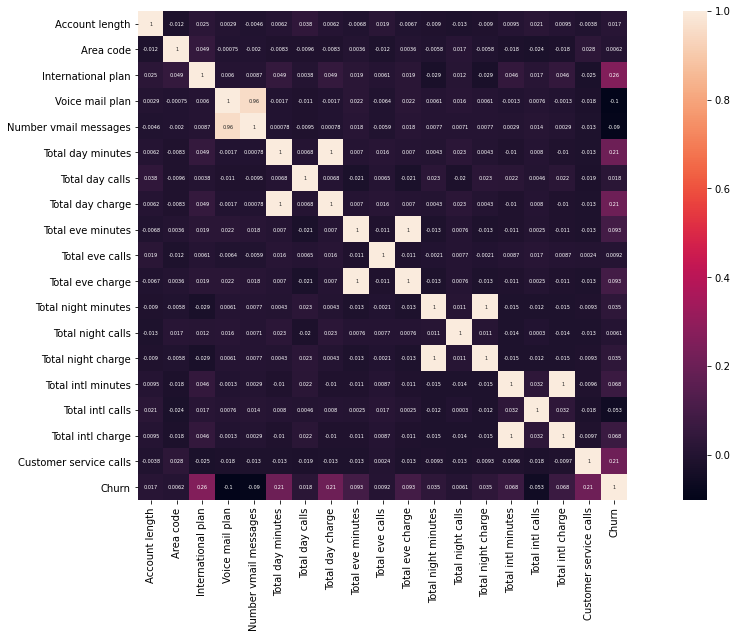

In [7]:
# Mapa de calor para escolher as colunas
corr = df.corr()
plt.subplots(figsize=(20,9))
sns.heatmap(corr, annot_kws={'size':5}, square=True, annot=True)

plt.show()

In [8]:
# Trocando dados categóricos para númericos no datasets de teste e treino
dt_train['Churn'] = dt_train['Churn'].replace('False', 0).replace('True', 1).astype('int')
dt_train['International plan'] = dt_train['International plan'].replace('No', 0).replace('Yes', 1).astype('int')
dt_train['Voice mail plan'] = dt_train['Voice mail plan'].replace('No', 0).replace('Yes', 1).astype('int')

dt_test['Churn'] = dt_test['Churn'].replace('False', 0).replace('True', 1).astype('int')
dt_test['International plan'] = dt_test['International plan'].replace('No', 0).replace('Yes', 1).astype('int')
dt_test['Voice mail plan'] = dt_test['Voice mail plan'].replace('No', 0).replace('Yes', 1).astype('int')

In [9]:
# Pegando apenas as colunas de interesse no dataset de treino
colunas_interesse = ['Churn', 'International plan', 'Total day minutes', 'Total day charge', 'Customer service calls']
dt_train = dt_train[['Churn', 'International plan', 'Total day minutes', 'Total day charge', 'Customer service calls']]

dt_train.head(10)

,Churn,International plan,Total day minutes,Total day charge,Customer service calls
0,0,0,265.1,45.07,1
1,0,0,161.6,27.47,1
2,0,0,243.4,41.38,0
3,0,1,299.4,50.90,2
4,0,1,166.7,28.34,3
5,0,1,223.4,37.98,0
6,0,0,218.2,37.09,3
7,0,1,157.0,26.69,0
8,0,1,258.6,43.96,0
9,0,0,187.7,31.91,0


In [10]:
# Pegando quantidade de churn
dt_train.groupby('Churn').count()


,International plan,Total day minutes,Total day charge,Customer service calls
Churn,,,,
0,2278,2278,2278,2278
1,388,388,388,388


In [11]:
dt_train_churn = dt_train[dt_train['Churn'] == 1]
dt_train_no_churn = dt_train[dt_train['Churn'] == 0]

dt_train = pd.concat([dt_train_no_churn.sample(n=388), dt_train_churn], ignore_index=True, sort=False)

In [12]:
dt_train.groupby('Churn').count()

,International plan,Total day minutes,Total day charge,Customer service calls
Churn,,,,
0,388,388,388,388
1,388,388,388,388


In [13]:
# Criando escala
sc = MinMaxScaler()

In [14]:
def process_train(data):
    data[colunas_interesse] = sc.fit_transform(data[colunas_interesse])
    
    return data

In [15]:
def process_test(data):
    data[colunas_interesse] = sc.fit_transform(data[colunas_interesse])
    
    return data   

In [16]:
dt_test = dt_test[['Churn', 'International plan', 'Total day minutes', 'Total day charge', 'Customer service calls']]

train_scaled = process_train(dt_train)
test_scaled = process_test(dt_test)

train_scaled.head(10)

,Churn,International plan,Total day minutes,Total day charge,Customer service calls
0,0.0,0.0,0.452109,0.452046,0.333333
1,0.0,0.0,0.413056,0.412978,0.222222
2,0.0,0.0,0.663341,0.663313,0.555556
3,0.0,0.0,0.419612,0.419517,0.111111
4,0.0,0.0,0.549601,0.549631,0.333333
5,0.0,0.0,0.275941,0.275989,0.222222
6,0.0,0.0,0.689567,0.689470,0.000000
7,0.0,0.0,0.418187,0.418176,0.333333
8,0.0,0.0,0.408495,0.408451,0.111111
9,0.0,0.0,0.007412,0.007378,0.333333


In [17]:
# Import para regressão
from sklearn.linear_model import LogisticRegression

In [18]:
X = train_scaled['Churn']
Y = train_scaled.drop('Churn', axis=1)
Z = test_scaled.drop('Churn', axis=1)

logreg = LogisticRegression(max_iter=1000)
logreg.fit(Y, X)
log_Y_pred = logreg.predict(Z)
acc_log = round(logreg.score(Y, X) * 100, 2)

print(log_Y_pred)
print(acc_log)

[0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0.
 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1.
 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0.
 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0.
 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0.
 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.

In [19]:
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(test_scaled['Churn'], log_Y_pred)

print(cf_matrix)

[[442 130]
 [ 26  69]]


In [20]:
#from tensorflow import keras

#model = keras.Sequential()
#model.add(keras.layers.Dense(5, input_shape=(776,5), activation='relu' ))

#model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['binary_accuracy'])

#model.fit(
#  train_scaled,
#  dt_train,
#  epochs=2000,
#  batch_size=128,
#  verbose=1,
#  validation_data=(test_scaled, dt_test)
#)

#eval = model.evaluate(x=test_scaled, y=dt_test)

#print(eval)

# Transformando em array
train_x = train_scaled.iloc[:, 1:6].values
train_y = train_scaled.iloc[:, 0:1].values

In [21]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
train_y = ohe.fit_transform(train_y).toarray()

print(train_y)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [22]:
# Transformando em array os dados de teste
test_x = test_scaled.iloc[:, 1:6].values
test_y = test_scaled.iloc[:, 0:1].values

test_y = ohe.fit_transform(test_y).toarray()

print(test_y)

[[1. 0.]
 [0. 1.]
 [0. 1.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [243]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

#Rede Neural
model = Sequential()
model.add(Dense(100, input_dim=4, activation='relu'))
model.add(Dense(15, activation='relu'))
#model.add(Dense(15, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
historico = model.fit(train_x, train_y, epochs=200)

Epoch 1/200
25/25 [==============================] - 0s 542us/step - loss: 0.6835 - accuracy: 0.6070
Epoch 2/200
25/25 [==============================] - 0s 542us/step - loss: 0.6613 - accuracy: 0.6920
Epoch 3/200
25/25 [==============================] - 0s 542us/step - loss: 0.6421 - accuracy: 0.6933
Epoch 4/200
25/25 [==============================] - 0s 542us/step - loss: 0.6264 - accuracy: 0.6920
Epoch 5/200
25/25 [==============================] - 0s 542us/step - loss: 0.6154 - accuracy: 0.7088
Epoch 6/200
25/25 [==============================] - 0s 500us/step - loss: 0.6045 - accuracy: 0.7204
Epoch 7/200
25/25 [==============================] - 0s 500us/step - loss: 0.5939 - accuracy: 0.7126
Epoch 8/200
25/25 [==============================] - 0s 500us/step - loss: 0.5830 - accuracy: 0.7539
Epoch 9/200
25/25 [==============================] - 0s 500us/step - loss: 0.5669 - accuracy: 0.7320
Epoch 10/200
25/25 [==============================] - 0s 542us/step - loss: 0.5579 - accura

25/25 [==============================] - 0s 500us/step - loss: 0.4567 - accuracy: 0.7977
Epoch 82/200
25/25 [==============================] - 0s 500us/step - loss: 0.4565 - accuracy: 0.7951
Epoch 83/200
25/25 [==============================] - 0s 500us/step - loss: 0.4605 - accuracy: 0.7951
Epoch 84/200
25/25 [==============================] - 0s 500us/step - loss: 0.4580 - accuracy: 0.8003
Epoch 85/200
25/25 [==============================] - 0s 500us/step - loss: 0.4561 - accuracy: 0.7990
Epoch 86/200
25/25 [==============================] - 0s 500us/step - loss: 0.4569 - accuracy: 0.7925
Epoch 87/200
25/25 [==============================] - 0s 500us/step - loss: 0.4563 - accuracy: 0.8003
Epoch 88/200
25/25 [==============================] - 0s 500us/step - loss: 0.4560 - accuracy: 0.8080
Epoch 89/200
25/25 [==============================] - 0s 500us/step - loss: 0.4570 - accuracy: 0.7990
Epoch 90/200
25/25 [==============================] - 0s 500us/step - loss: 0.4575 - accuracy: 

25/25 [==============================] - 0s 500us/step - loss: 0.4512 - accuracy: 0.8015
Epoch 161/200
25/25 [==============================] - 0s 583us/step - loss: 0.4589 - accuracy: 0.8041
Epoch 162/200
25/25 [==============================] - 0s 542us/step - loss: 0.4565 - accuracy: 0.7990
Epoch 163/200
25/25 [==============================] - 0s 500us/step - loss: 0.4540 - accuracy: 0.7990
Epoch 164/200
25/25 [==============================] - 0s 542us/step - loss: 0.4566 - accuracy: 0.8015
Epoch 165/200
25/25 [==============================] - 0s 500us/step - loss: 0.4526 - accuracy: 0.8041
Epoch 166/200
25/25 [==============================] - 0s 542us/step - loss: 0.4525 - accuracy: 0.8028
Epoch 167/200
25/25 [==============================] - 0s 500us/step - loss: 0.4556 - accuracy: 0.7990
Epoch 168/200
25/25 [==============================] - 0s 500us/step - loss: 0.4540 - accuracy: 0.7977
Epoch 169/200
25/25 [==============================] - 0s 542us/step - loss: 0.4535 - a

In [244]:
pred_test = model.predict(test_x)

# Convertendo para label
pred = list()
for i in range(len(pred_test)):
    pred.append(np.argmax(pred_test[i]))
# Convertendo hot encode para label
test = list()
for i in range(len(test_y)):
    test.append(np.argmax(test_y[i]))

In [245]:
from sklearn.metrics import accuracy_score

ac = accuracy_score(pred, test)
print('Accuracy: ', ac*100)

Accuracy:  79.91004497751123


In [246]:
historico = model.fit(train_x, train_y, validation_data=(test_x, test_y), epochs=200)

Epoch 1/200
25/25 [==============================] - 0s 5ms/step - loss: 0.4497 - accuracy: 0.8003 - val_loss: 0.4912 - val_accuracy: 0.7946
Epoch 2/200
25/25 [==============================] - 0s 1ms/step - loss: 0.4486 - accuracy: 0.8028 - val_loss: 0.5187 - val_accuracy: 0.7781
Epoch 3/200
25/25 [==============================] - 0s 1ms/step - loss: 0.4478 - accuracy: 0.8041 - val_loss: 0.5193 - val_accuracy: 0.7796
Epoch 4/200
25/25 [==============================] - 0s 1ms/step - loss: 0.4484 - accuracy: 0.8041 - val_loss: 0.4997 - val_accuracy: 0.7886
Epoch 5/200
25/25 [==============================] - 0s 1ms/step - loss: 0.4472 - accuracy: 0.8067 - val_loss: 0.4944 - val_accuracy: 0.7946
Epoch 6/200
25/25 [==============================] - 0s 1ms/step - loss: 0.4493 - accuracy: 0.8054 - val_loss: 0.5107 - val_accuracy: 0.7871
Epoch 7/200
25/25 [==============================] - 0s 1ms/step - loss: 0.4493 - accuracy: 0.8080 - val_loss: 0.4938 - val_accuracy: 0.7931
Epoch 8/200
2

Epoch 59/200
25/25 [==============================] - 0s 1ms/step - loss: 0.4450 - accuracy: 0.8067 - val_loss: 0.4998 - val_accuracy: 0.7901
Epoch 60/200
25/25 [==============================] - 0s 1ms/step - loss: 0.4447 - accuracy: 0.8067 - val_loss: 0.4764 - val_accuracy: 0.7991
Epoch 61/200
25/25 [==============================] - 0s 1ms/step - loss: 0.4457 - accuracy: 0.8067 - val_loss: 0.4746 - val_accuracy: 0.8036
Epoch 62/200
25/25 [==============================] - 0s 1ms/step - loss: 0.4440 - accuracy: 0.8119 - val_loss: 0.4959 - val_accuracy: 0.7916
Epoch 63/200
25/25 [==============================] - 0s 1ms/step - loss: 0.4440 - accuracy: 0.8028 - val_loss: 0.4804 - val_accuracy: 0.8036
Epoch 64/200
25/25 [==============================] - 0s 1ms/step - loss: 0.4459 - accuracy: 0.8028 - val_loss: 0.4643 - val_accuracy: 0.8111
Epoch 65/200
25/25 [==============================] - 0s 1ms/step - loss: 0.4472 - accuracy: 0.8041 - val_loss: 0.4877 - val_accuracy: 0.7931
Epoch 

25/25 [==============================] - 0s 1ms/step - loss: 0.4411 - accuracy: 0.8067 - val_loss: 0.4845 - val_accuracy: 0.7991
Epoch 117/200
25/25 [==============================] - 0s 1ms/step - loss: 0.4388 - accuracy: 0.8080 - val_loss: 0.4902 - val_accuracy: 0.7946
Epoch 118/200
25/25 [==============================] - 0s 1ms/step - loss: 0.4413 - accuracy: 0.8028 - val_loss: 0.4526 - val_accuracy: 0.8156
Epoch 119/200
25/25 [==============================] - 0s 1ms/step - loss: 0.4389 - accuracy: 0.8054 - val_loss: 0.5119 - val_accuracy: 0.7856
Epoch 120/200
25/25 [==============================] - 0s 1ms/step - loss: 0.4382 - accuracy: 0.8106 - val_loss: 0.4962 - val_accuracy: 0.7871
Epoch 121/200
25/25 [==============================] - 0s 1ms/step - loss: 0.4384 - accuracy: 0.8080 - val_loss: 0.4875 - val_accuracy: 0.7976
Epoch 122/200
25/25 [==============================] - 0s 1ms/step - loss: 0.4404 - accuracy: 0.8003 - val_loss: 0.4718 - val_accuracy: 0.8006
Epoch 123/200

25/25 [==============================] - 0s 1ms/step - loss: 0.4321 - accuracy: 0.8131 - val_loss: 0.4579 - val_accuracy: 0.8186
Epoch 174/200
25/25 [==============================] - 0s 1ms/step - loss: 0.4339 - accuracy: 0.8131 - val_loss: 0.5118 - val_accuracy: 0.7811
Epoch 175/200
25/25 [==============================] - 0s 1ms/step - loss: 0.4359 - accuracy: 0.8119 - val_loss: 0.5385 - val_accuracy: 0.7661
Epoch 176/200
25/25 [==============================] - 0s 1ms/step - loss: 0.4334 - accuracy: 0.8067 - val_loss: 0.4507 - val_accuracy: 0.8276
Epoch 177/200
25/25 [==============================] - 0s 1ms/step - loss: 0.4363 - accuracy: 0.8080 - val_loss: 0.4967 - val_accuracy: 0.7976
Epoch 178/200
25/25 [==============================] - 0s 1ms/step - loss: 0.4323 - accuracy: 0.8119 - val_loss: 0.4710 - val_accuracy: 0.8081
Epoch 179/200
25/25 [==============================] - 0s 1ms/step - loss: 0.4358 - accuracy: 0.8106 - val_loss: 0.4578 - val_accuracy: 0.8156
Epoch 180/200

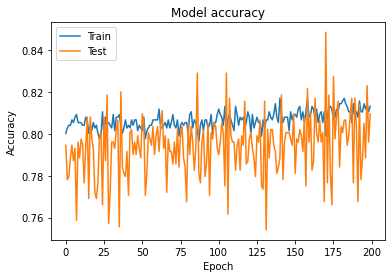

In [247]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

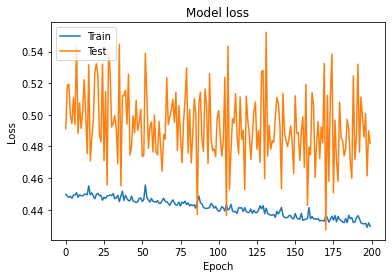

In [248]:
plt.plot(historico.history['loss']) 
plt.plot(historico.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()